In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
rootdir = './test1/'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件

### Zonal Sea Water Temperature

In [4]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
temp = ds['ts'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    temp = temp + ds['ts'][0]
temp = temp/len(list)

In [5]:
lon = ds['ts'].coords['lon'].values #182 (0,362,2) !!!! 2,362
lat = ds['ts'].coords['lat'].values #115 (90,-78,2)
lev = ds['ts'].coords['lev'].values #115 (90,-78,2)

In [6]:
ver_Temp = []
for i in range(len(lev)):
    zonal_temp = [] 
    itemp = temp[i]
    for j in range(len(lat)):#层内纬度平均
        zonal_temp.append(np.nanmean(itemp[j,1:].values,axis=0)) #remove lon = 0
    ver_Temp.append(zonal_temp)
ver_Temp = np.array(ver_Temp)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [7]:
ver_temp = xr.DataArray(ver_Temp,coords=[lev,lat],dims=['Depth','Latitude'])
#ver_temp.coords['lat'].attrs['units'] = 'degree_north'
ver_temp.coords['Depth'].attrs['units'] = 'm'

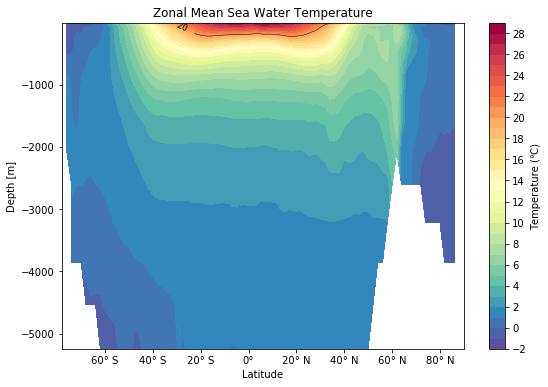

In [11]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Temperature (℃)',
  # 'shrink': 0.8,
   'ticks': np.arange(-2,30,2)
}
levels = np.arange(-2,30,1)
filled_c = ver_temp.plot.contourf(ax=ax, levels=levels,cbar_kwargs=cbar_kwargs, cmap='Spectral_r')
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)

# Add black line contours.
plt.rcParams['contour.negative_linestyle'] = 'dashed'
line_c = ver_temp.plot.contour(ax=ax, levels=[20], colors=['black'],linewidths=0.5)

 # Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    fontsize=8,
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)


ax.set_title("Zonal Mean Sea Water Temperature")  # Add a title to the axes.
tick = ['0','60° S','40° S','20° S','0°','20° N','40° N','60° N','80° N']
ax.set_xticklabels(tick)

plt.savefig('VerTemp1986-90.png')
plt.show()

### ZONAL MEAN SALINITY

In [12]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
ss = ds['ss'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    ss = ss + ds['ss'][0]
ss = ss/len(list)

In [13]:
ver_ss = []
for i in range(len(lev)):
    zonal_ss = [] 
    ssi = ss[i]
    for j in range(len(lat)):#层内纬度平均
        zonal_ss.append(np.nanmean(ssi[j,1:].values,axis=0))#remove lon = 0
    ver_ss.append(zonal_ss)
ver_ss = np.array(ver_ss)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [14]:
ver_ss = xr.DataArray(ver_ss,coords=[lev,lat],dims=['Depth','Latitude'])
#ver_temp.coords['lat'].attrs['units'] = 'degree_north'
ver_ss.coords['Depth'].attrs['units'] = 'm'

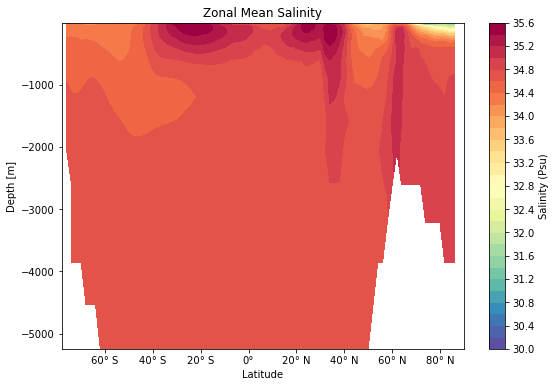

In [16]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Salinity (Psu)',
  # 'shrink': 0.8,
   'ticks': np.arange(30,35.6,0.4)
}
levels = np.arange(30,35.6,0.2)
ver_ss.plot.contourf(ax=ax, levels=levels,cbar_kwargs=cbar_kwargs, cmap='Spectral_r')
ax
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)
ax.set_title("Zonal Mean Salinity")  # Add a title to the axes.
tick = ['0','60° S','40° S','20° S','0°','20° N','40° N','60° N','80° N']
ax.set_xticklabels(tick)

plt.savefig('VerSali1986-90.png')
plt.show()

### Equatorial Sea Water Temperature (2° N，2° S)

In [17]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
temp = ds['ts'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    temp = temp + ds['ts'][0]
temp = temp/len(list)

In [18]:
ver_Temp = []
for i in range(len(lev)):
    zonal_temp = [] 
    itemp = temp[i]
    for j in range(len(lon)-1):#层内纬度平均  # lon - 1 cycle 
        zonal_temp.append(np.nanmean(itemp[58:63,j+1].values,axis=0)) # j:lon 2：362; lat[58:63]=[-2,2]
    ver_Temp.append(zonal_temp)
ver_Temp = np.array(ver_Temp)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [19]:
lon=lon[1:]
ver_temp = xr.DataArray(ver_Temp,coords=[lev,lon],dims=['Depth','Longitude'])
#ver_temp.coords['lon'].attrs['units'] = 'degree_west'
ver_temp.coords['Depth'].attrs['units'] = 'm'

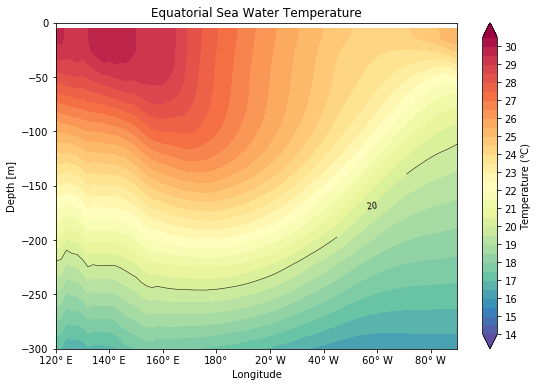

In [29]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Temperature (℃)',
  # 'shrink': 0.8,
   'ticks': np.arange(14,31,1)
}
levels = np.arange(14,31,0.5)
ver_temp.plot.contourf(ax=ax, levels=levels, cbar_kwargs=cbar_kwargs, cmap='Spectral_r')

# Add black line contours.
plt.rcParams['contour.negative_linestyle'] = 'dashed'
line_c = ver_temp.plot.contour(ax=ax, levels=[20], colors=['black'],linewidths=0.5)

 # Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    fontsize=8,
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)


ax.set_ylim(-300,0)
ax.set_xlim(120,270)
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)
ax.set_title("Equatorial Sea Water Temperature")  # Add a title to the axes.
tick = ['120° E','140° E','160° E','180°','20° W','40° W','60° W','80° W','100° W']
ax.set_xticklabels(tick)

plt.savefig('Ver55Temp1986-90.png')
plt.show()

### Equatorial Zonal Current(U) (2° N，2° S)

In [21]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
us = ds['us'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    us = us + ds['us'][0]
us = us/len(list)

In [22]:
ver_us = []
for i in range(len(lev)):
    zonal_us = [] 
    ius = us[i]
    for j in range(len(lon)-1):#层内纬度平均  # lon - 1 cycle 
        zonal_us.append(np.nanmean(ius[58:63,j+1].values,axis=0)) # j:lon 2：362; lat[58:63]=[-2,2]
    ver_us.append(zonal_us)
ver_us = np.array(ver_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [23]:
lon=lon[1:]
ver_Us = xr.DataArray(ver_us,coords=[lev,lon],dims=['Depth','Longitude'])
#ver_temp.coords['lon'].attrs['units'] = 'degree_west'
ver_Us.coords['Depth'].attrs['units'] = 'm'

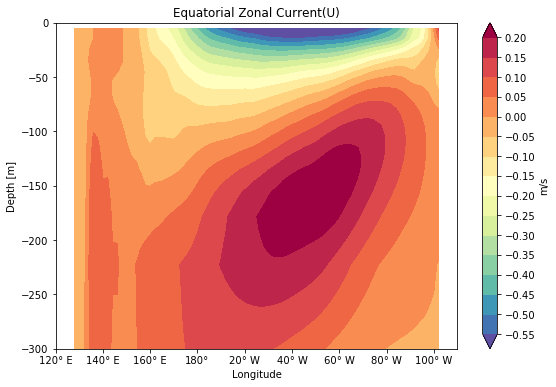

In [28]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'm/s',
  # 'shrink': 0.8,
   'ticks': np.arange(-0.55,0.25,0.05)
}
levels = np.arange(-0.55,0.25,0.05)
ver_Us.plot.contourf(ax=ax, levels=levels, cbar_kwargs=cbar_kwargs, cmap='Spectral_r')
ax.set_ylim(-300,0)
ax.set_xlim(120,290)
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)
ax.set_title("Equatorial Zonal Current(U)")  # Add a title to the axes.
tick = ['120° E','140° E','160° E','180°','20° W','40° W','60° W','80° W','100° W']
ax.set_xticklabels(tick)

plt.savefig('Ver22Cur1986-90.png')
plt.show()

In [1]:
a = [[1,2,3],[1,2,3],[1,2,3]]
a

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [2]:
import numpy

In [5]:
ave = numpy.mean(a,axis=0)

In [6]:
ave

array([1., 2., 3.])